In [4]:
!git clone https://github.com/lucas-noblat/GerOndApp.git

import sys

sys.path.append('/content/GerOndApp/APP')


import functions as fc
import scipy.signal


Cloning into 'GerOndApp'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 197 (delta 17), reused 1 (delta 1), pack-reused 163 (from 1)
Receiving objects: 100% (197/197), 4.45 MiB | 15.72 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [5]:
from bokeh.plotting import figure, show

## Gerando sinais

In [6]:
# Número de amostras por segundo

t_amostragem = 1000

- **Senoidal**

<StemContainer object of 3 artists>

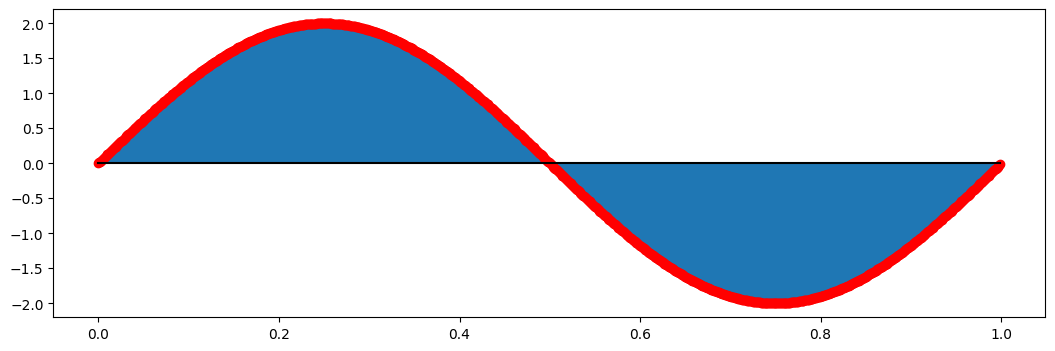

In [7]:
# Criando sinal

vetor_tempo, s_senoidal = fc.sinal_senoidal(amplitude=2, frequencia=1, taxa_amostragem= t_amostragem)

# Plottando

#fc.plotar(vetor_tempo, s_senoidal, nome='Sinal senodial', largura=1280, altura=400, legenda=f'{t_amostragem} amostras por segundo')

fc.plt.figure(figsize=(12.8, 4.0))
fc.plt.stem(vetor_tempo, s_senoidal, linefmt='-', markerfmt='ro', basefmt='-k')


- **Triangular**

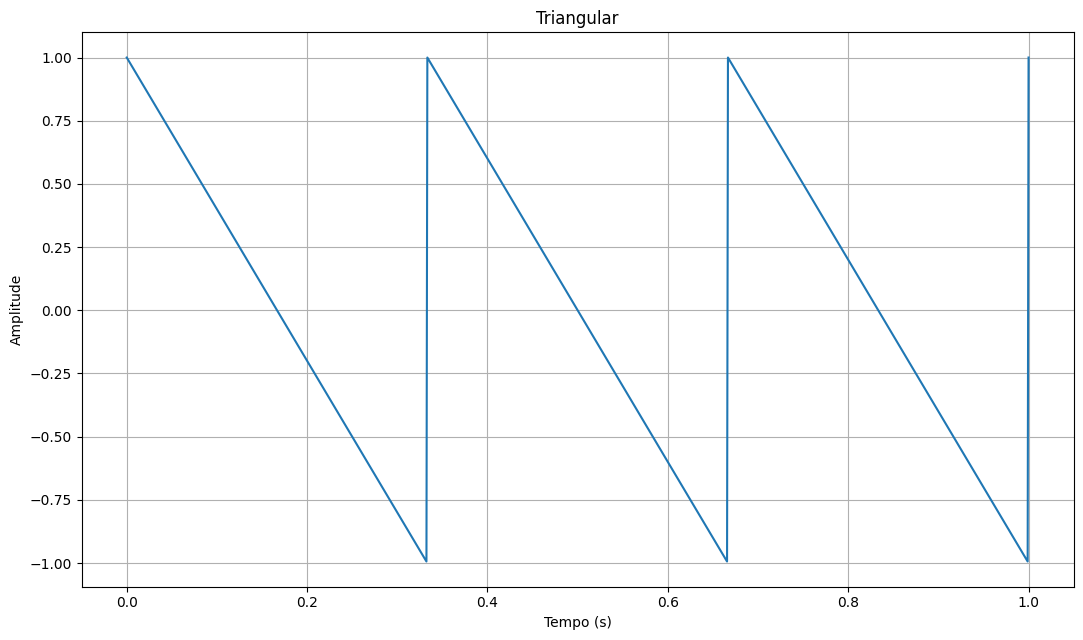

In [8]:
# Gerando sinal e vetor X

vetor_tempo, sinal_triangular = fc.sinal_triangular(amplitude=1, frequencia=3)

# Plotando

fc.plotar(vetor_tempo, sinal_triangular, nome=''Triangular')

- **Quadrada**

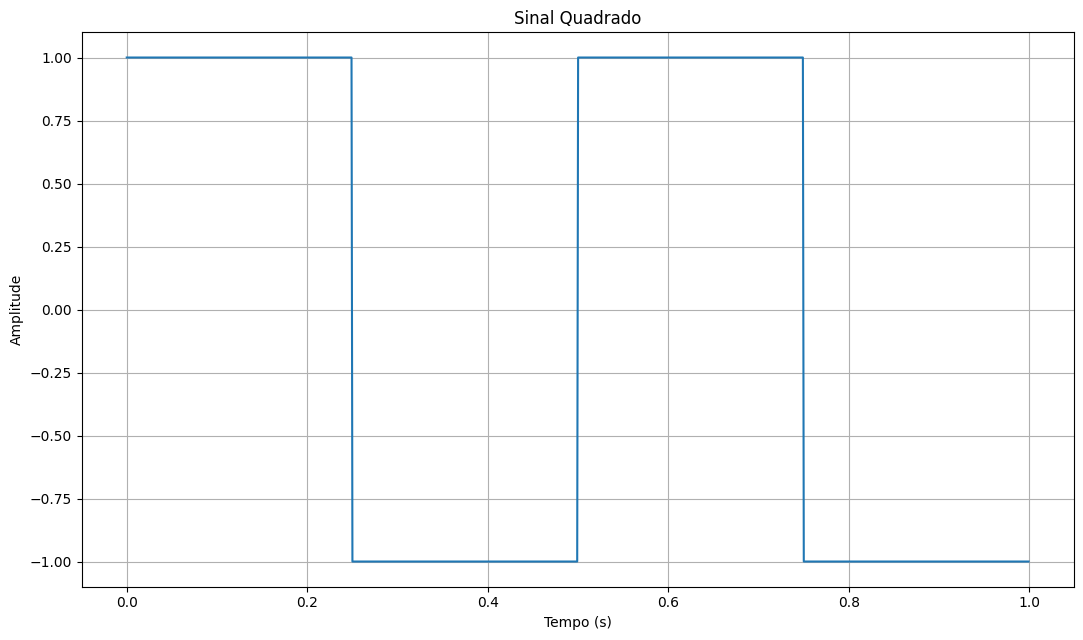

In [9]:
# Gerando
x, sinal_quadrado = fc.sinal_quadrado(amplitude=1, frequencia=2)

# Plotando

fc.plotar(x, sinal_quadrado, nome = 'Sinal Quadrado')

- **Ruído Branco**

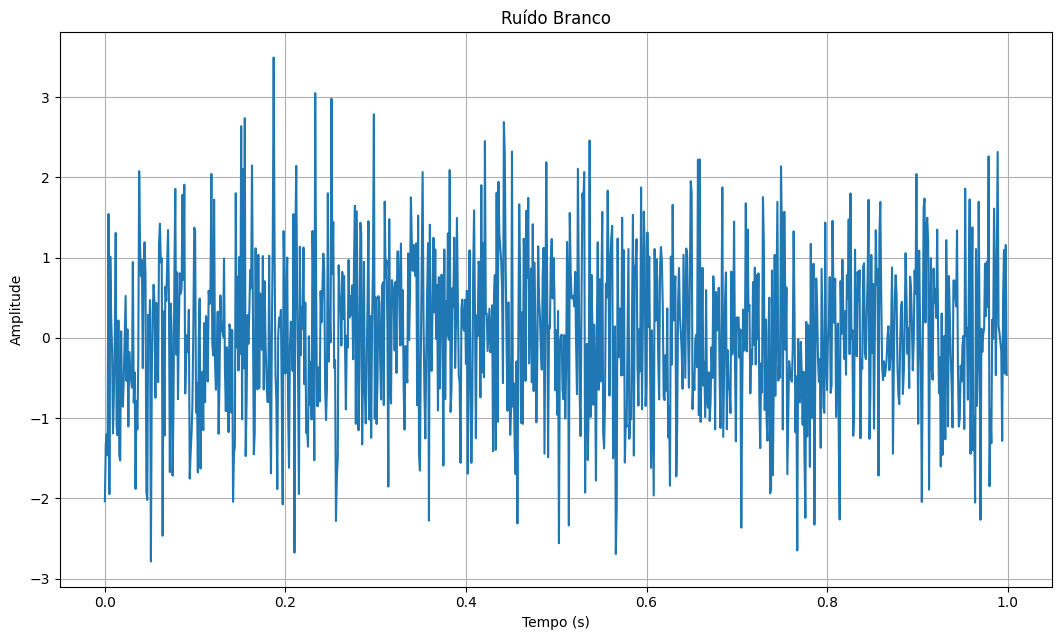

In [10]:
# Gerando

x, ruido_branco = fc.ruido_branco(amplitude=1, freq_inicial=0,freq_final=1,num_componentes=1000, duracao=1)

# Plotando

fc.plotar(x, ruido_branco, 'Ruído Branco', salvar_como='Ruido Branco')

## Convertendo domínio do tempo para frequência

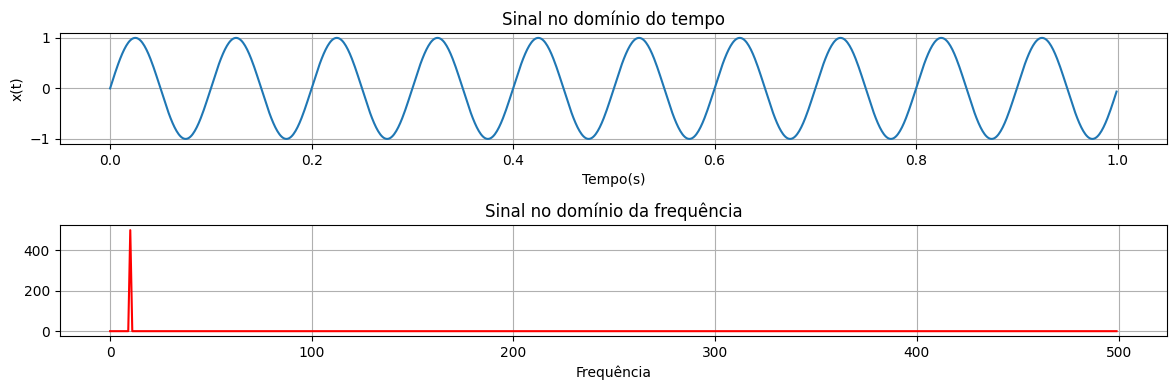

In [11]:
# Gerando sinal

x_tempo, s_senoidal = fc.sinal_senoidal(amplitude=1,frequencia=10)

# Aplicando a transformada de fourier

frequencias, sinal_transformado = fc.transformada_fourier(x_tempo, s_senoidal)

# Plotando no domínio do tempo

fc.plt.figure(figsize=(12,4))
fc.plt.subplot(2,1,1)
fc.plt.plot(x_tempo, s_senoidal)
fc.plt.title('Sinal no domínio do tempo')
fc.plt.xlabel('Tempo(s)')
fc.plt.ylabel('x(t)')
fc.plt.grid()


# PLotando no domínio da frequência


fc.plt.subplot(2,1,2)
fc.plt.plot(frequencias, sinal_transformado, color='red')
fc.plt.title('Sinal no domínio da frequência')
fc.plt.xlabel('Frequência')

fc.plt.grid()


fc.plt.tight_layout()
fc.plt.show()

## Bokeh - biblioteca de plotagem

- **Plotando 'n' sinais**

In [12]:
# Gerando os 3 sinais a serem usados e pegando o vetor_tempo


x_tempo, s1 = fc.sinal_senoidal(amplitude=1, frequencia=1)
s2 = fc.sinal_senoidal(amplitude=1, frequencia=3)[1]
s3 = fc.sinal_senoidal(amplitude=1, frequencia=5)[1]


# Gerando a resultante como soma de 3 senoidais
res = s1 + s2 + s3

# Aplicando a transformada de Fourier

frequencias, sinal_transformado = fc.transformada_fourier(x_tempo, res)

# Plotando

fc.plotar_sinais_bokeh(x_tempo, [s1], largura=1050, altura = 600)

fc.plotar_sinais_bokeh(frequencias, [sinal_transformado])

In [15]:
p = figure(width = 1050, height = 600)
p.line(x_tempo, res, line_color="yellow")
p.background_fill_color = 'black'
p.background_fill_alpha = 1
show(p)